In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
plt.style.use('publication')


In [2]:
def delay(time : np.ndarray, sig : np.ndarray) -> float : 
    """
    delay return the time delay of the signal

    Parameters
    ----------
    time : np.ndarray
        _description_
    sig : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    return time[np.argmax(abs(sig))]

In [3]:
def delay_dispersion(time, signal) -> float: 
    """
    delay_dispersion return the dispersion of the signal given a threshold 1/e * max(signal)

    Parameters
    ----------
    time : np.ndarray
        _description_
    signal : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    mask = np.abs(signal) > np.exp(-1) * np.max(np.abs(signal))
    time_window = time[mask]
    
    return (time_window[-1] - time_window[0]) / 2 

In [4]:
import scipy.constants as cst
n_c = 50e9 ** 2 /cst.e**2*(cst.m_e*cst.epsilon_0)
dt = 2.4509803921568632e-12

### Importing data

In [24]:
amplitude_norm = []
pulse_norm = []
delay_list_norm = []
std_list = []
dir = os.listdir('../../output/normalized_linear_profile')
for i , subfolder in tqdm(enumerate(dir)) :
    if subfolder[0] == 'a' : 
        IQ_list = np.array([np.load(f'../../output/normalized_linear_profile/{subfolder}/{file}') for file in os.listdir(f'../../output/normalized_linear_profile/{subfolder}') if file[0] == 'I'])
        std_list.append( np.array([np.load(f'../../output/normalized_linear_profile/{subfolder}/{file}',  allow_pickle=True) for file in os.listdir(f'../../output/normalized_linear_profile/{subfolder}') if file[0] == 's']))
        amplitude_norm.append(float(subfolder.split('_')[1]))
        pulse_norm.append(IQ_list[:,1])
        delay_list_norm.append([delay(*IQ) for IQ in IQ_list])

0it [00:00, ?it/s]

In [25]:
np.save('../extract_data/delay_list_norm', delay_list_norm)
np.save('../extract_data/pulse_norm', pulse_norm)
np.save('../extract_data/amplitude_norm', amplitude_norm)

In [6]:
pulse_norm = np.load('../extract_data/pulse_norm.npy')
delay_list_norm = np.load('../extract_data/delay_list_norm.npy')
amplitude_norm = np.load('../extract_data/amplitude_norm.npy')

In [7]:
pulse_4 = np.load('../extract_data/pulse_4.npy')
delay_list_4 = np.load('../extract_data/delay_list_4.npy')
amplitude_4 = np.load('../extract_data/amplitude_4.npy')

In [5]:
pulse_quad = np.load('../extract_data/pulse_quad.npy')
delay_list_quad = np.load('../extract_data/delay_list_quad.npy')
amplitude_quad = np.load('../extract_data/amplitude_quad.npy')

In [141]:

amp = np.std(pulse_norm, axis = 2)
amp_2 = np.std(pulse_4, axis = 2)
amp_3 = np.std(pulse_quad, axis = 2)

In [142]:
index = np.argsort(amplitude_norm)
index_2 = np.argsort(amplitude_4)
index_3 = np.argsort(amplitude_quad)

In [10]:
rms_n, rms_td = np.load('../extract_data/1d.npy')

In [11]:
dt_theo =  2 * 0.1 / 3e8 * np.sqrt(10) * np.array(rms_n)

Introduction to the distribution analysis

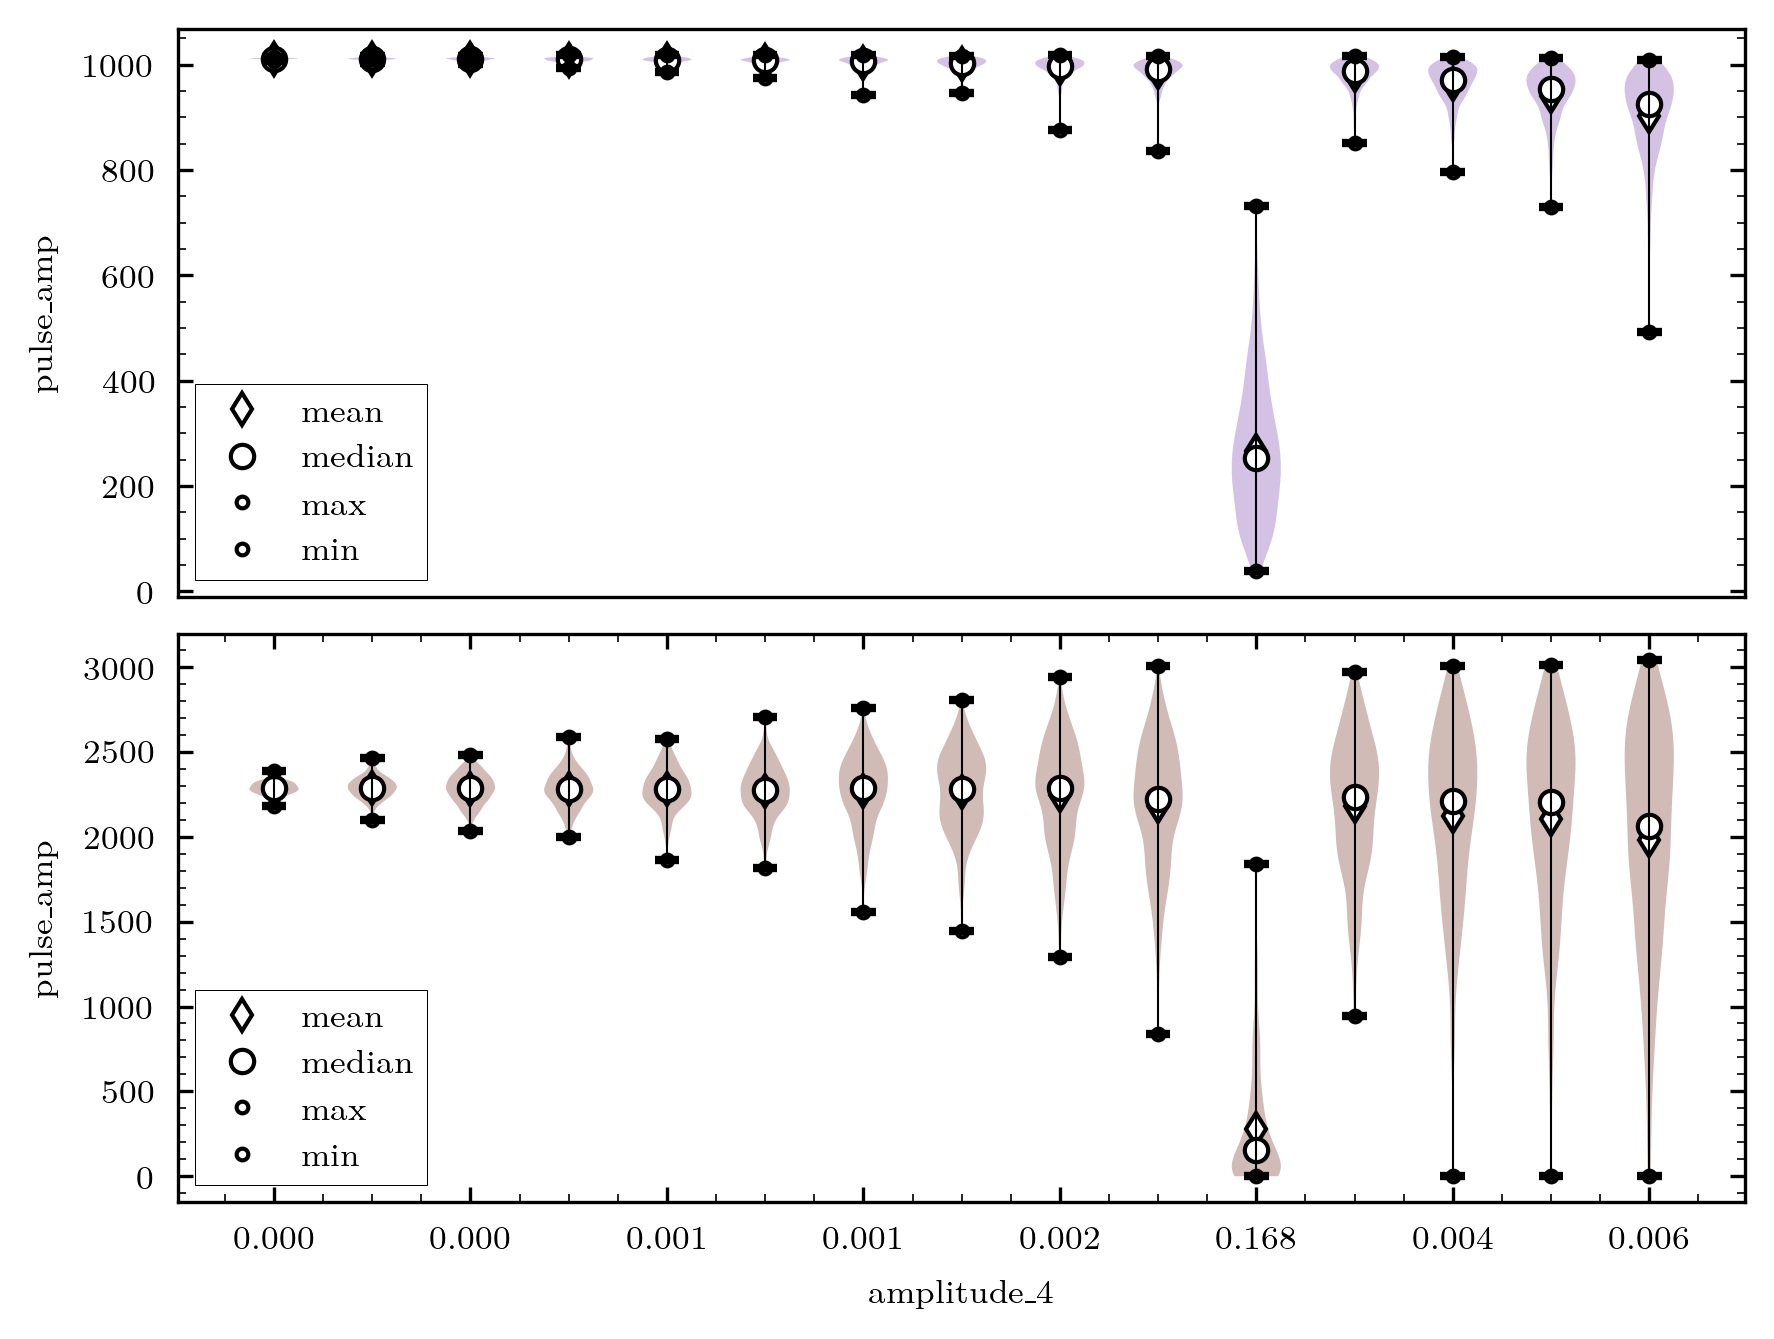

In [144]:
W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, axs = plt.subplots(2, 1, figsize = (W, W * 3 / 4), dpi = 300)

ax, ax2 = axs
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.mean(amp_2, axis = 1)[index][::2], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.median(amp_2, axis = 1)[index][::2], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.max(amp_2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.min(amp_2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax.violinplot(np.array(amp_2)[index][::2, :].real.T, showmeans=False, showmedians=False)


ax.set_ylabel('pulse_amp')
ax.set_xticks([])
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax.legend()
amp2 = np.max(pulse_4, axis = 2)
ax2.plot([],[])

ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.mean(amp2, axis = 1)[index][::2], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.median(amp2, axis = 1)[index][::2], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.max(amp2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.min(amp2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax2.violinplot(np.array(amp2)[index][::2,:].real.T, showmeans=False, showmedians=False)


ax2.set_xticks(range(1, len( np.array(amplitude_4)[index][::2]) + 1, 2))
ax2.set_xticklabels([str(r)[:5] for r in np.array(amplitude_4)[index][::4]])
ax2.set_xlabel('amplitude_4')
ax2.set_ylabel('pulse_amp')
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax2.legend()
plt.show()

/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


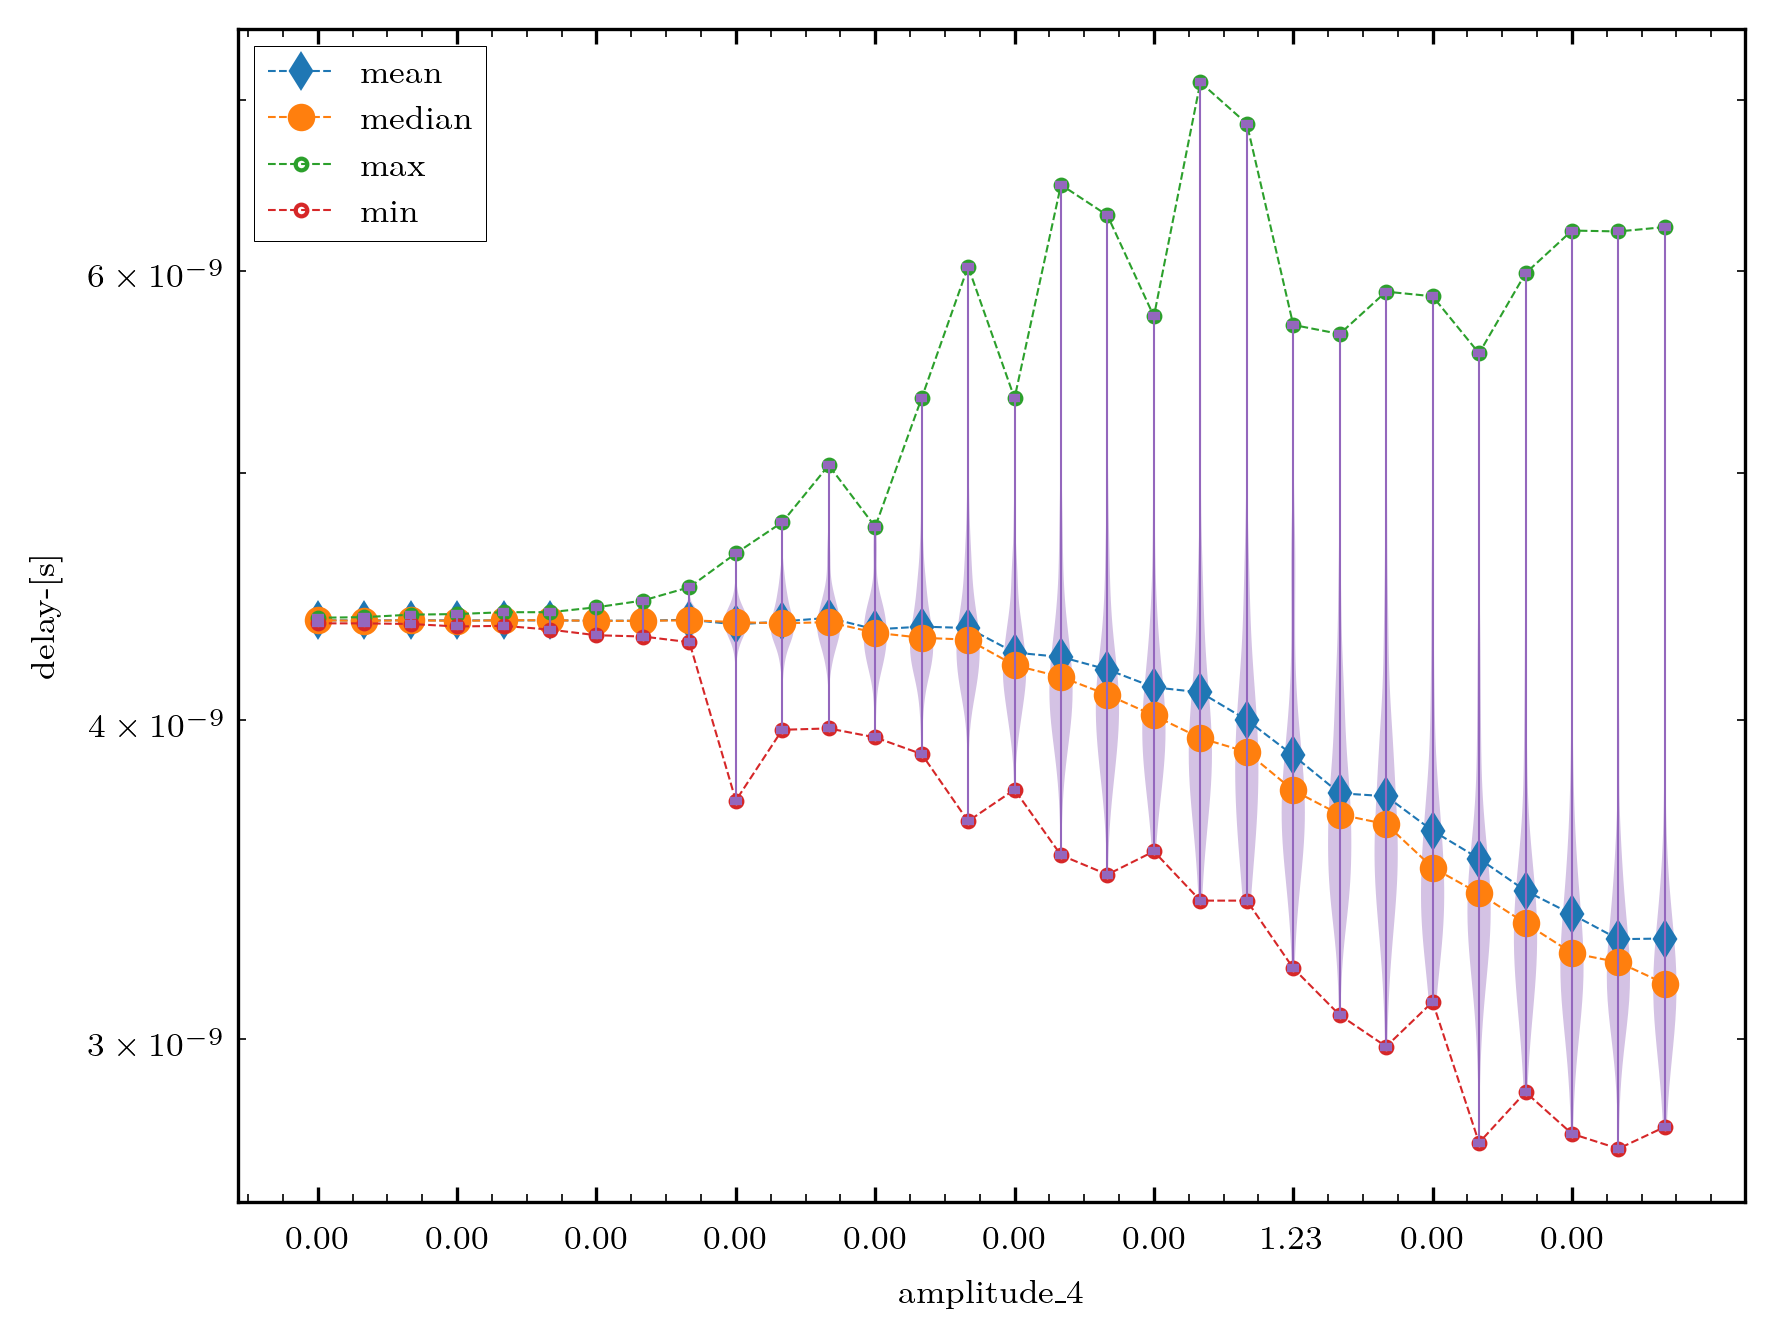

In [137]:
W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, ax = plt.subplots(1, figsize = (W, W * 3 / 4), dpi = 300)

ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.mean(delay_list_norm, axis = 1)[index], lw = .5, marker = 'd', mew = 1 ,ls = '--', label = 'mean')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.median(delay_list_norm, axis = 1)[index], lw = .5, marker = 'o', mew = 1. ,ls = '--', label = 'median')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.max(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1. ,ls = '--', label = 'max')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.min(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1, ls = '--', label = 'min')
violins = ax.violinplot(np.array(delay_list_norm)[index].real.T, showmeans=False, showmedians=False)

ax.set_yscale('log')

ax.set_xticks(range(1, len( np.array(amplitude_4)[index]) + 1, 3))
ax.set_xticklabels([str(r)[:4] for r in np.array(amplitude_4)[index][::3]])
ax.set_xlabel('amplitude_4')
ax.set_ylabel('delay-[s]')

for pc in violins['bodies']:

    pc.set_alpha(.4)

violins['cbars'].set_linewidth(.5)

ax.legend()
plt.show()


### Delay Study

In [13]:
from matplotlib.markers import MarkerStyle

In [12]:
nc2 = 3e10 /(2 * np.pi * 50e9 * np.sqrt(1 * 10 * np.log(10)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0001, 5)

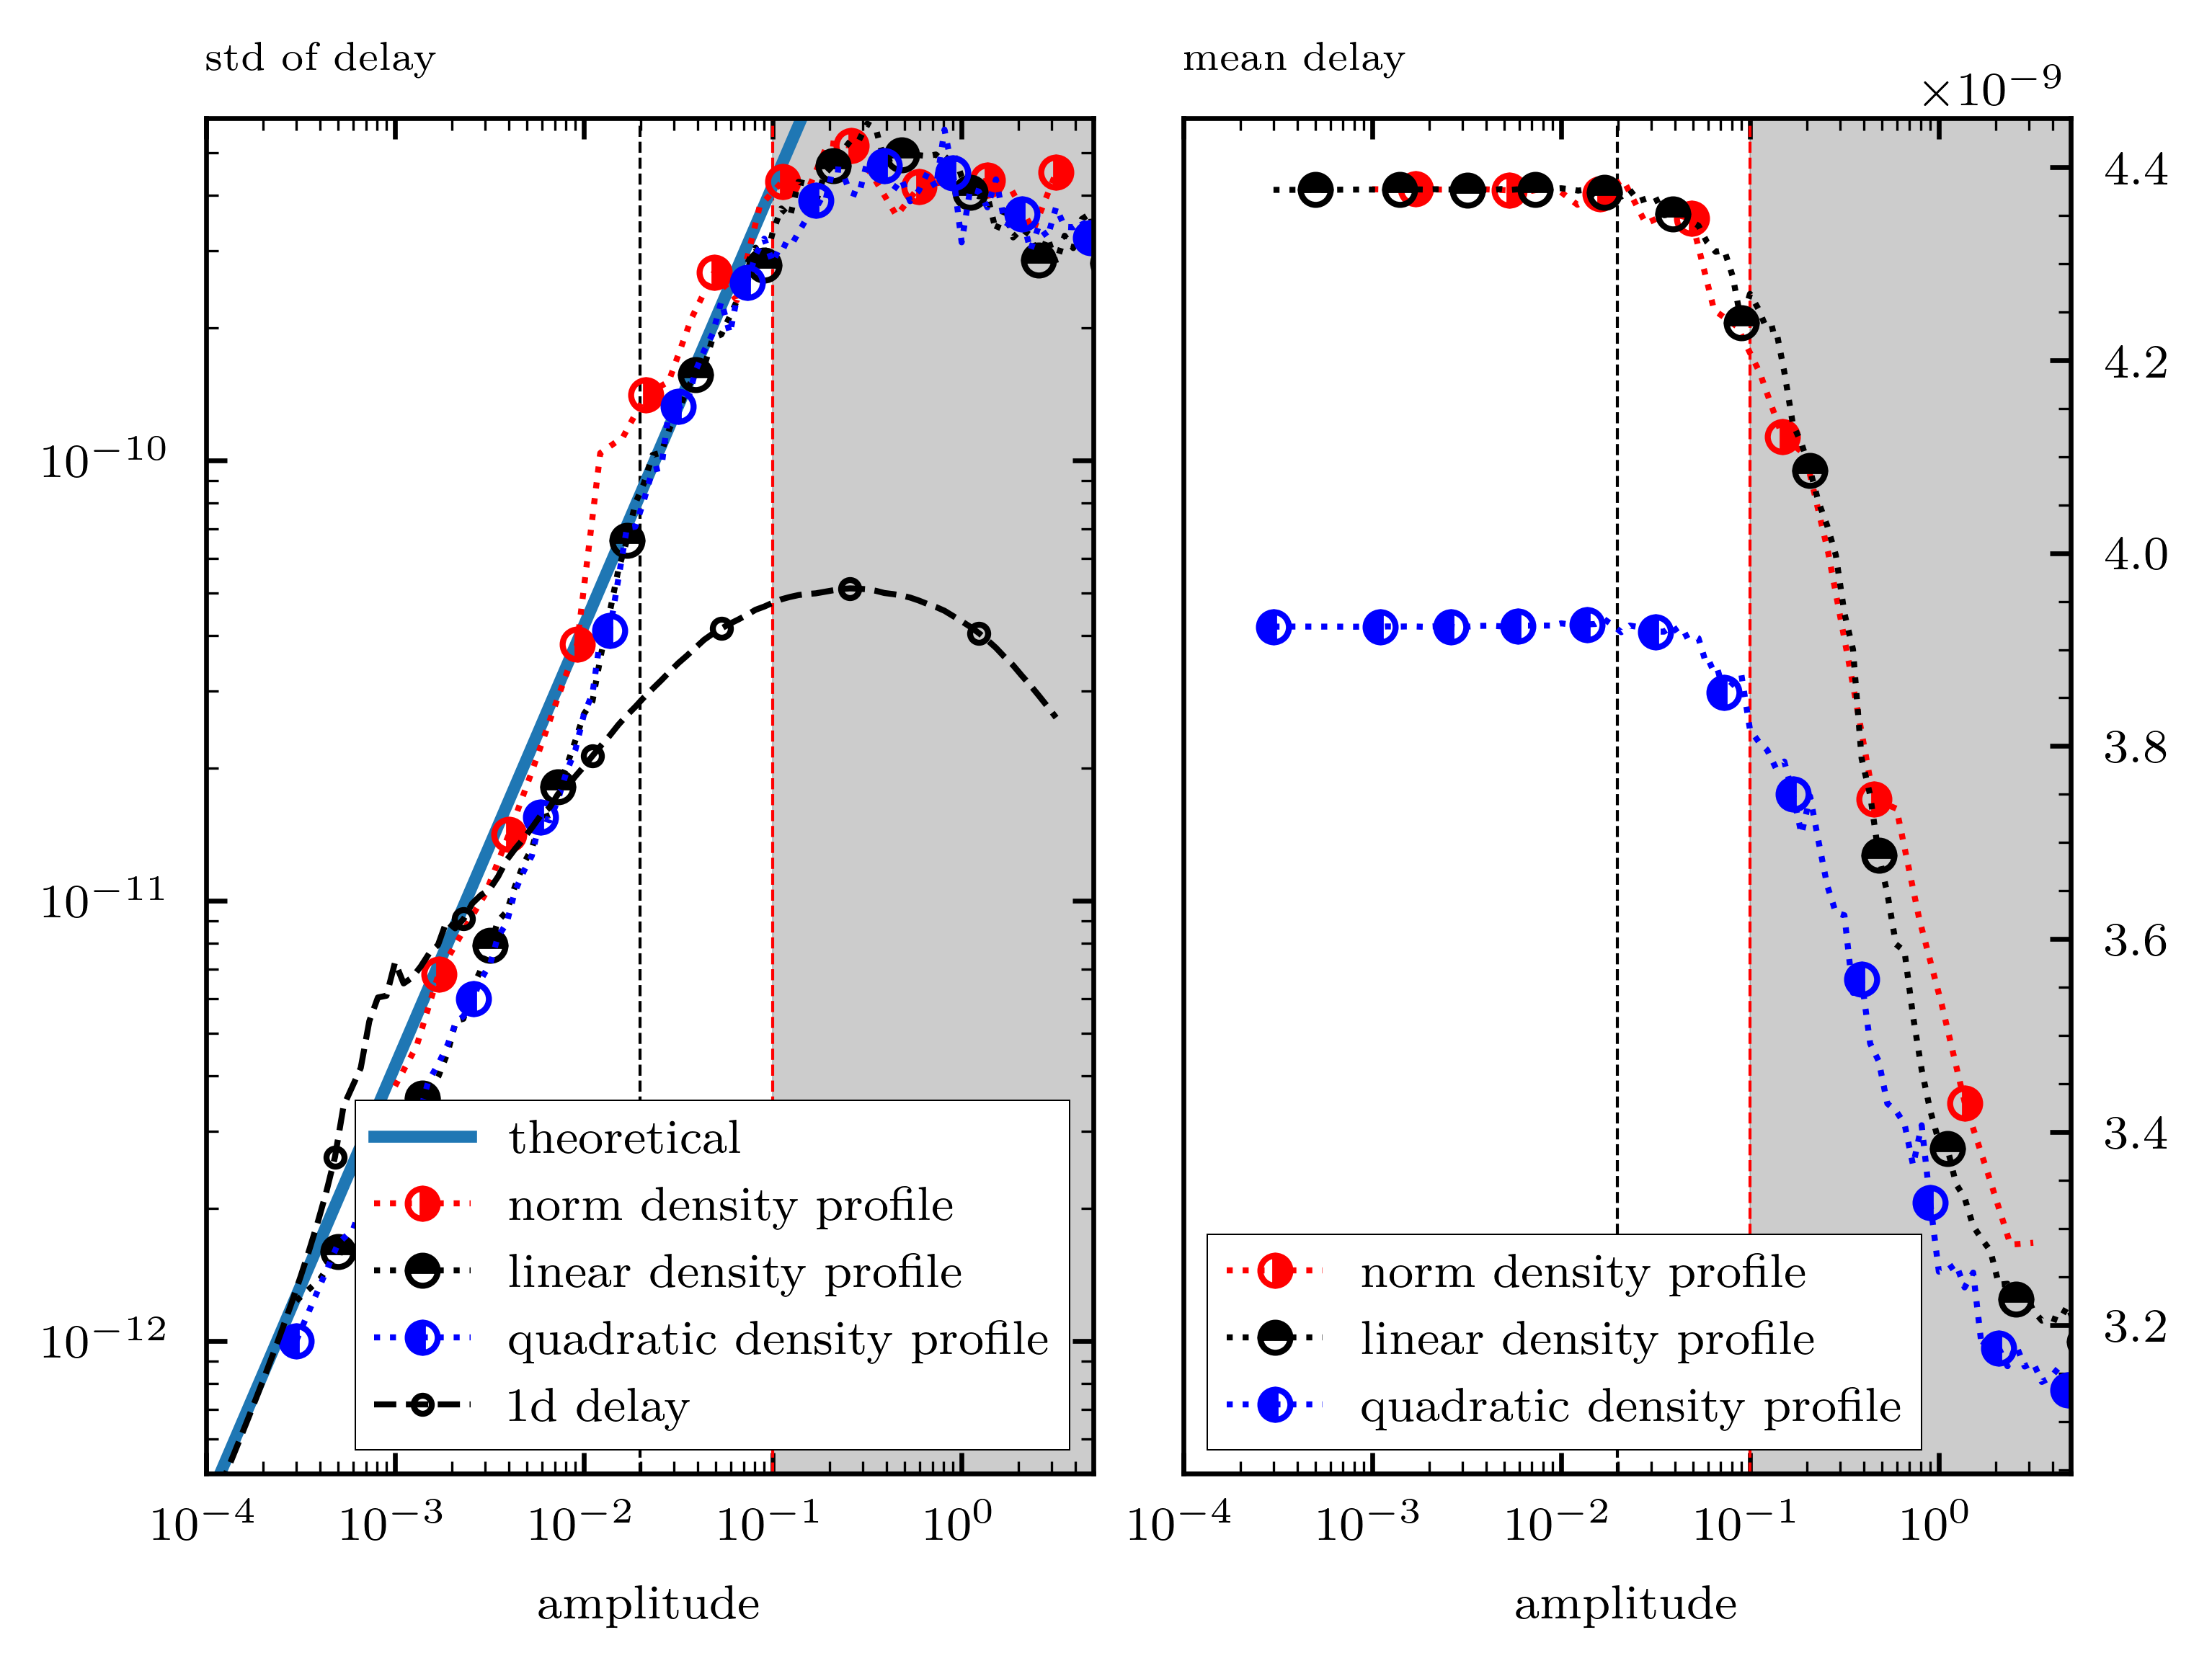

In [24]:
W = 5
fig, ax = plt.subplots(1,2, figsize = (W, W * 3/4))
ax[0].set_title('std of delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].loglog(rms_n,2 *  dt_theo  , label='theoretical', ls = '-', lw  = 2)

ax[0].plot(amplitude_norm[index], np.std(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"), label = 'norm density profile', lw = 1, markevery = (2, 3), ms = 5, color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density profile', lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], np.std(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quadratic density profile', lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[0].plot(rms_n, rms_td, label = '1d delay', lw = 1,  marker ='o', mfc = 'none', color = 'k', markevery = 15, ms = 3, ls = '--'  )

ax[0].set_xlim(1e-4, 5)
ax[0].legend(loc = 'lower right')
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(0.5e-12, 6e-10)
ax[0].set_xlabel('amplitude')
ax[1].set_title('mean delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)

ax[1].set_xlabel('amplitude')

ax[1].legend(loc = 'lower right')
ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].plot(amplitude_norm[index], np.mean(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"), label = 'norm density profile', lw = 1, markevery = (2, 4), ms = 5, color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], np.mean(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density profile', lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], np.mean(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quadratic density profile', lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
# ax[1].se_)yscale('log')
ax[1].legend(loc = 'lower left')
ax[1].set_xlim(1e-4, 5)

# plt.savefig('../Report/figures/delay_amp_norm_2.png', dpi = 300)

In [57]:

FWHM =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_norm]
FWHM_2 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_4]
FWHM_3 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_quad]


### Studying the mean of the variable

/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


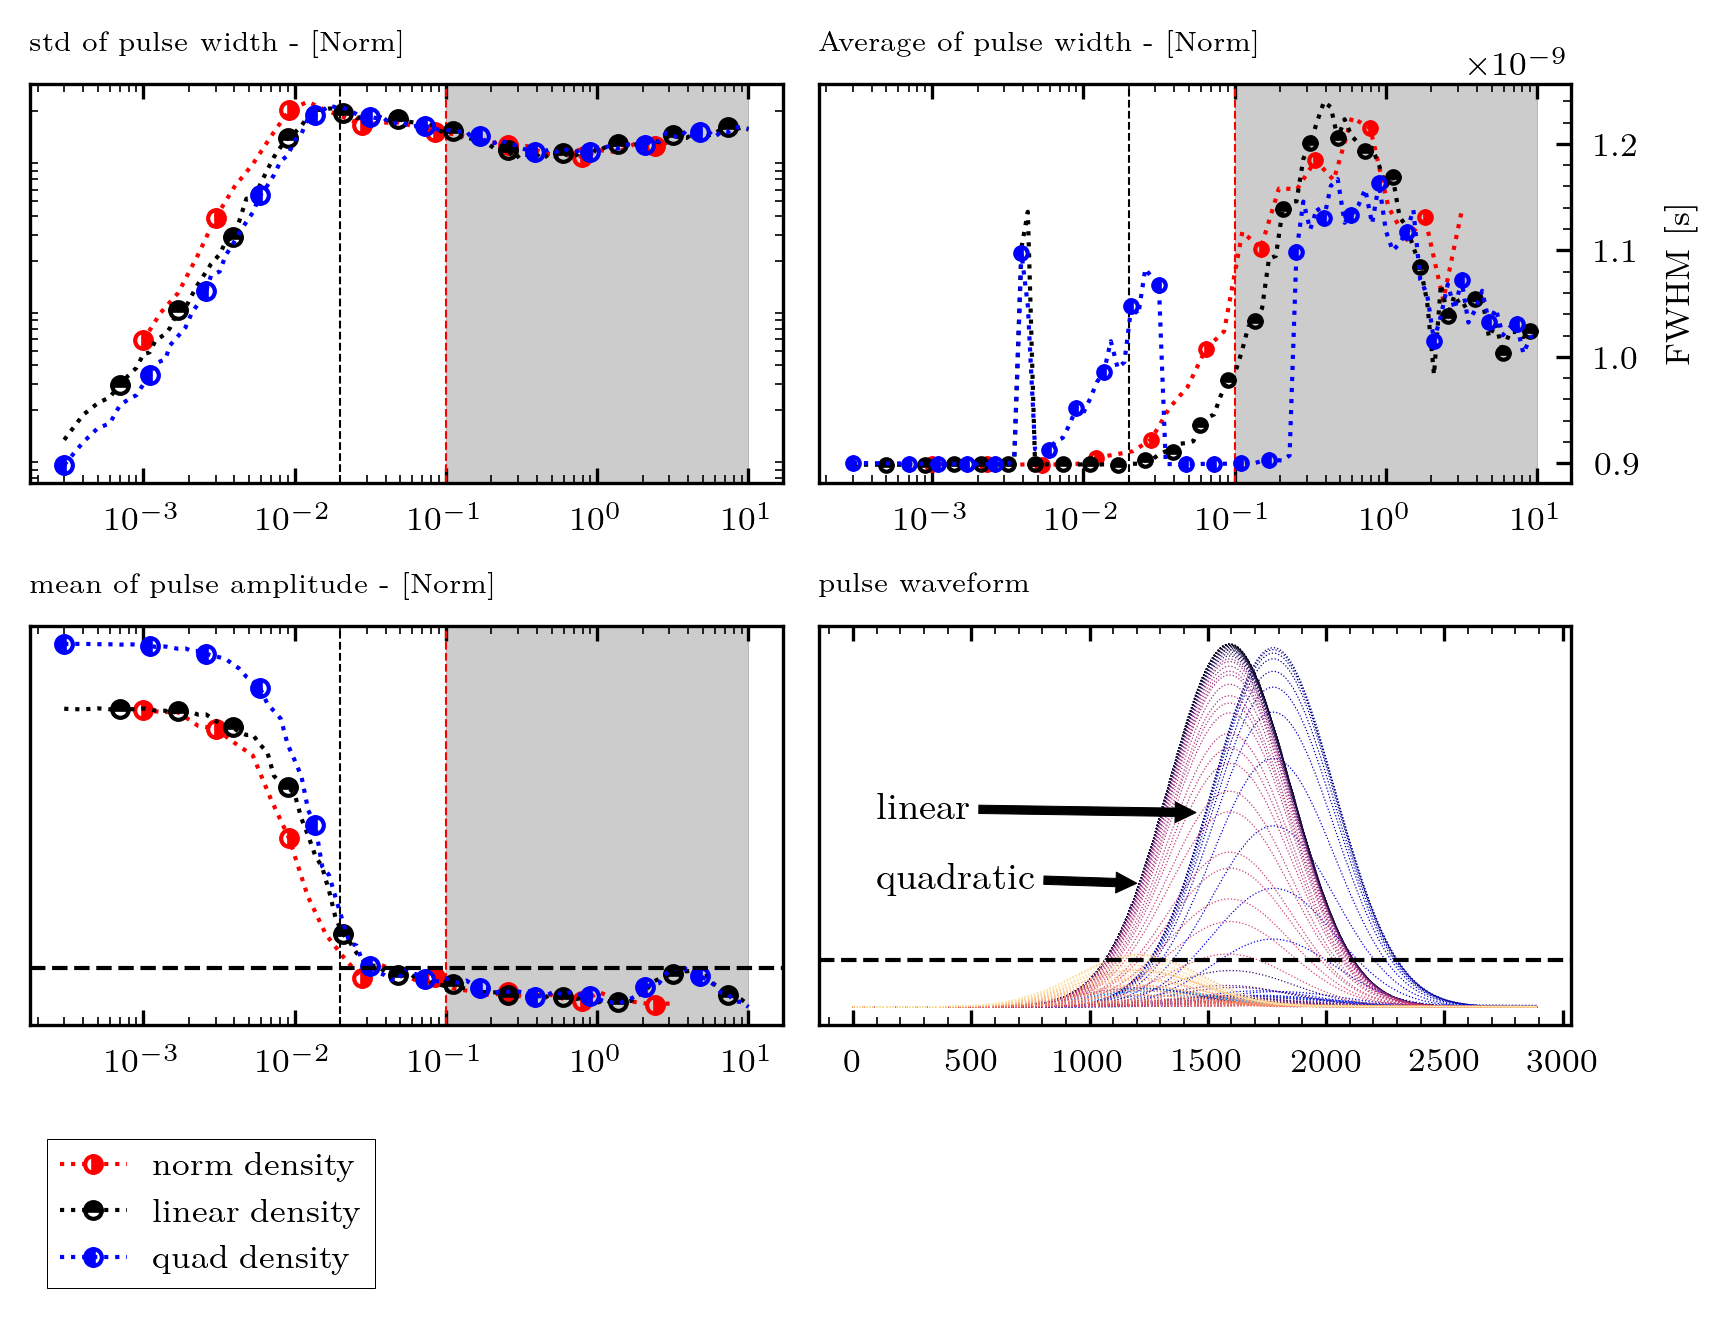

In [131]:
W = 5.8   
fig, ax = plt.subplots(2, 2, figsize = (W, W * 4 / 5), dpi = 300, layout = 'tight')
ax = ax.flatten()
ax[0].set_title('std of pulse width - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[0].plot(amplitude_norm[index], np.std(amp, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(amp_2, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density ', lw = 1, markevery = (4,8), ms = 4, color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], np.std(amp_3, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'linear density ', lw = 1, markevery = 8, ms = 4,   color = 'b', ls = ':')

ax[0].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_yticks([])

ax[1].set_title('Average of pulse width - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)


ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")

ax[1].plot(amplitude_norm[index],FWHM, marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 3, ms = 3,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], FWHM_2 , marker =MarkerStyle("o", fillstyle="top"), label = 'linear density', lw = 1, markevery = (2,4), ms = 3,   color = 'k', ls = ':')
ax[1].plot(amplitude_4[index_2], FWHM_3 , marker =MarkerStyle("o", fillstyle="left"), label = 'quadratic density', lw = 1, markevery = 4, ms = 3,   color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_ylabel('FWHM [s]')
# ax[1].legend(loc = 'lower left')
ax[1].yaxis.tick_right()
mean_pulse = np.max(pulse_norm, axis = 2)
mean_pulse_2 = np.max(pulse_4, axis = 2)
mean_pulse_3 = np.max(pulse_quad, axis = 2)

ax[2].set_title('mean of pulse amplitude - [Norm]', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index], np.mean(mean_pulse, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[2].plot(amplitude_4[index_2], np.mean(mean_pulse_2, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density', lw = 1, markevery = (4,8), ms = 4,   color = 'k', ls = ':')
ax[2].plot(amplitude_quad[index_3], np.mean(mean_pulse_3, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 1, markevery = 8, ms = 4,   color = 'b', ls = ':')

ax[2].legend(loc = 'lower left', bbox_to_anchor=(0., -.7))
ax[2].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_yticks([])
ax[2].axhline(450, color = 'k', ls = '--', lw = 1)


ax[3].set_title('pulse waveform', fontsize='small',
    loc='left',
    fontweight=1000,
    style='italic',)

ax[3].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_norm, axis = 1).T), lw = .3, ls = ':')

ax[3].set_prop_cycle(color=plt.cm.magma(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_quad, axis = 1).T), lw = .3,  ls = ':')

ax[3].set_yticks([])

ax[3].axhline(400, color = 'k', ls = '--', lw = 1)
ax[3].annotate("quadratic", xy=(1200, 1050), xytext=(100, 1000),
             arrowprops=dict(facecolor='black', width = 2, headwidth  = 5, headlength = 5), color = 'k', fontsize = 9)
ax[3].annotate("linear", xy=(1450, 1650), xytext=(100, 1600),
             arrowprops=dict(facecolor='black', width = 2, headwidth  = 5, headlength = 5), color = 'k', fontsize = 9)
plt.show()

### Skewness study

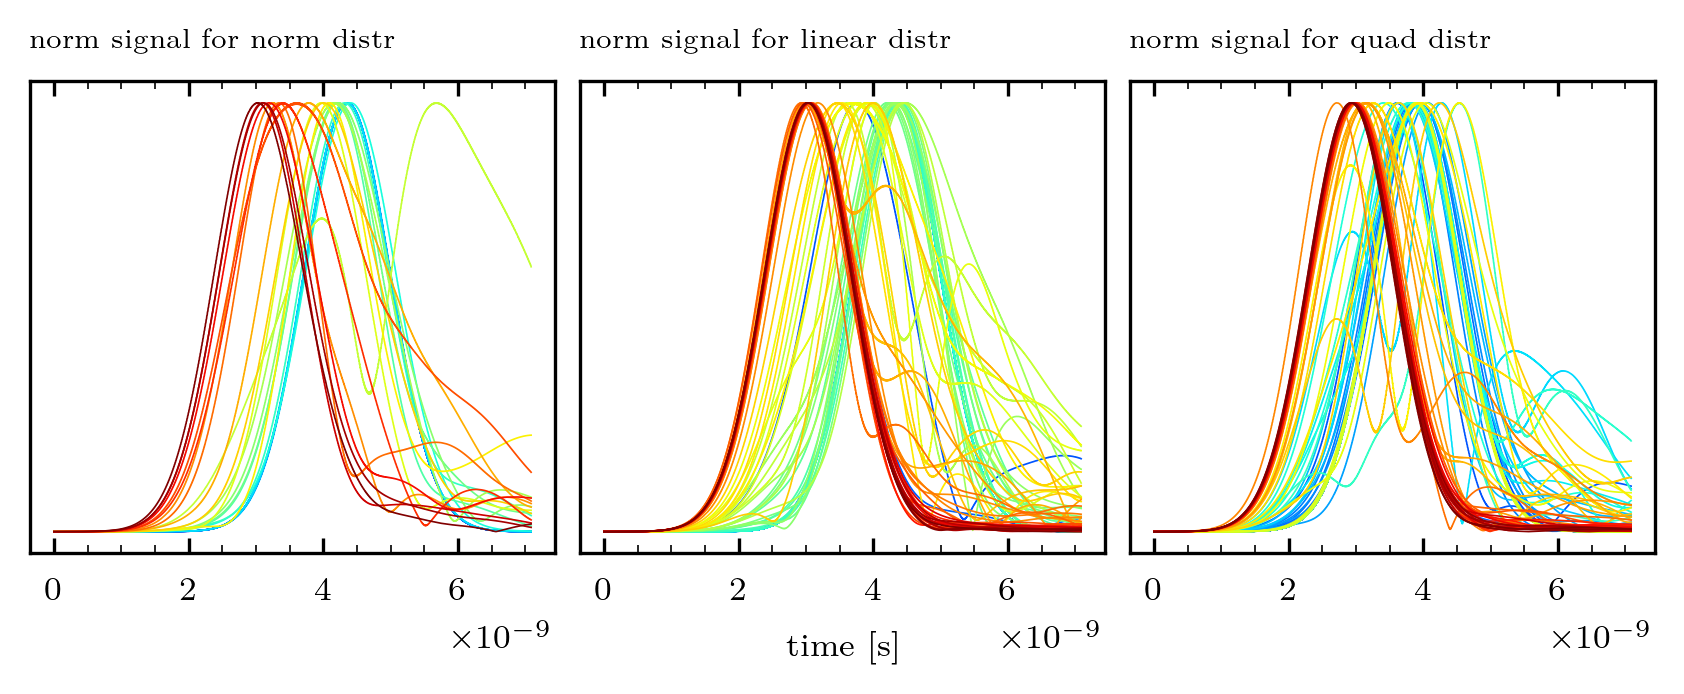

In [105]:
W = 5.5
fig, ax = plt.subplots(1, 3, figsize = (W, W * 2 / 5), dpi = 300)
ax[0].set_title('norm signal for norm distr', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].yaxis.set_visible(False)
ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 30)))
mean_pulse = abs(np.mean(pulse_norm, axis = 1))
ax[0].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .4)
ax[1].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 96)))
mean_pulse = abs(np.mean(pulse_4, axis = 1))
ax[1].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .4)
ax[1].set_title(' norm signal for linear distr', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel('time [s]')
ax[2].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 96)))
mean_pulse = abs(np.mean(pulse_quad, axis = 1))
ax[2].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .4)
ax[2].set_title('norm signal for quad distr', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[2].yaxis.set_visible(False)
plt.show()

In [106]:
from scipy.stats import skew

(0.0001, 5)

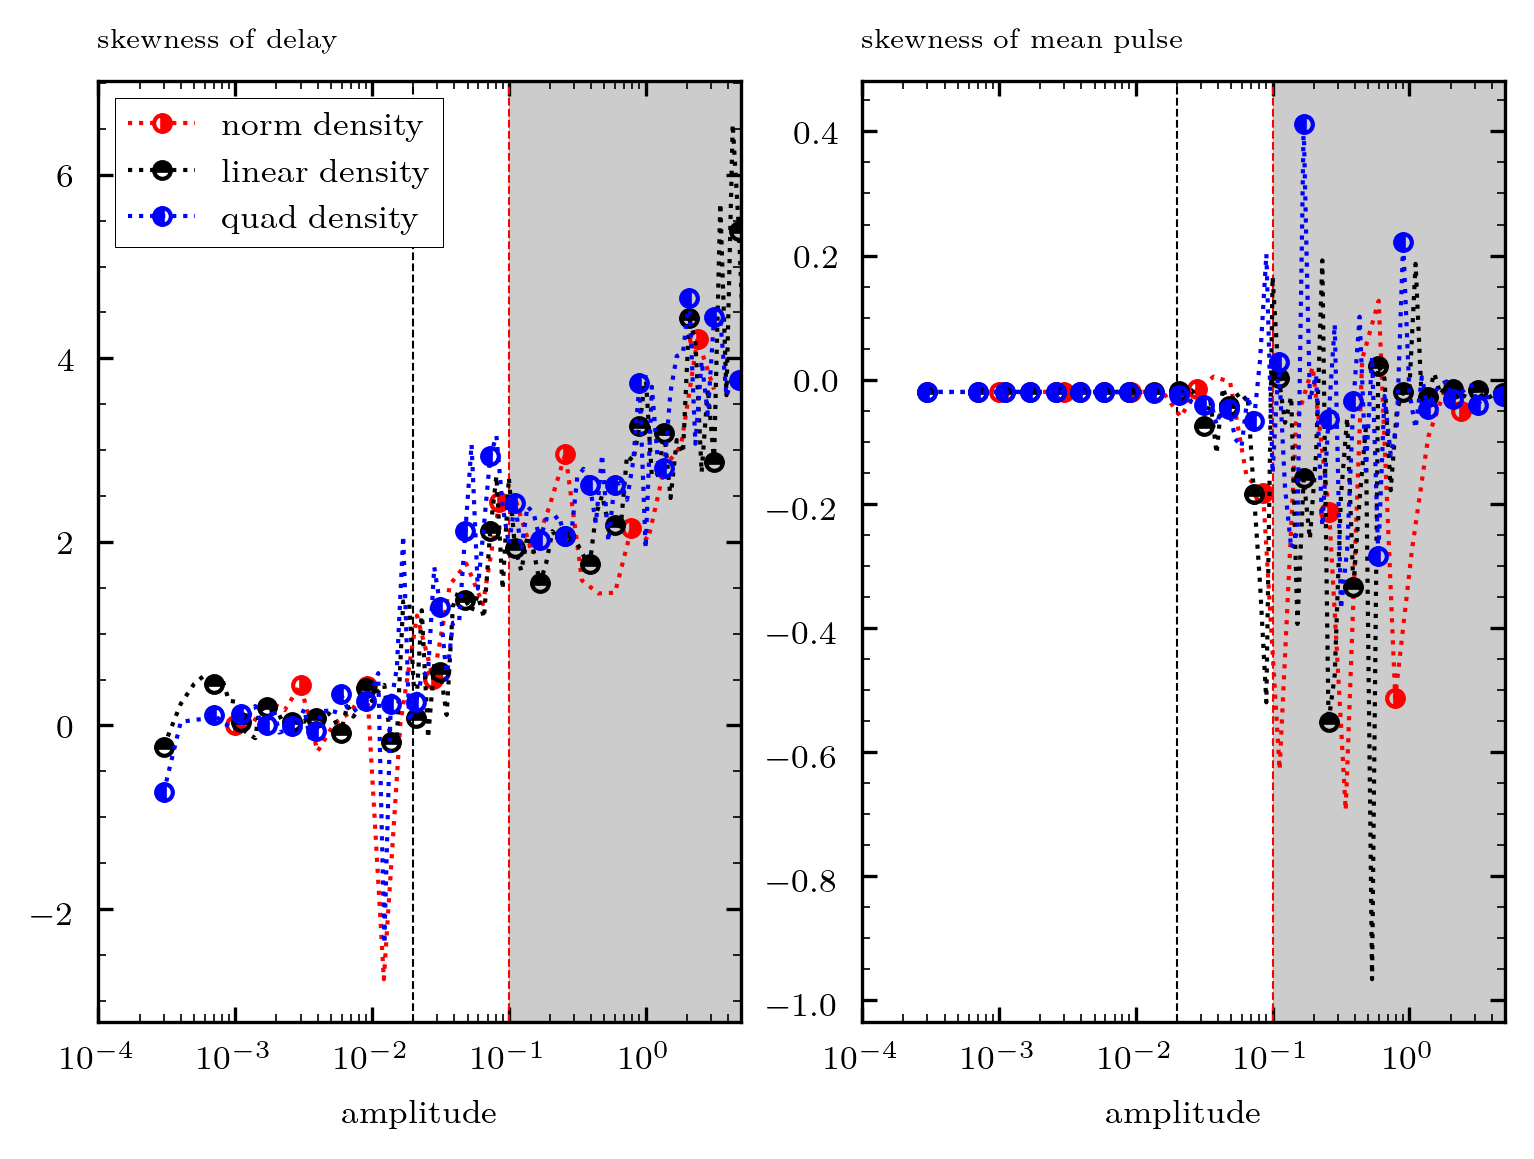

In [114]:
W = 5
fig, ax = plt.subplots(1, 2, figsize = (W, W * 3 / 4), dpi = 300)
ax[0].set_title('skewness of delay', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(amplitude_norm[index], skew(delay_list_norm, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], skew(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density', lw = 1, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], skew(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 1, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[0].set_xlim(1e-4, 5)
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_xlabel('amplitude')
ax[0].legend()
ax[1].set_title('skewness of mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)

ax[1].set_xlabel('amplitude')
ax[1].set_xscale('log')

ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")

mean_pulse = abs(np.mean(pulse_norm, axis = 1))[index]
mean_pulse = [mp[np.argmax(mp) - 550:np.argmax(mp)+550] for mp in mean_pulse]

mean_pulse_2 = abs(np.mean(pulse_4, axis = 1))[index_2]
mean_pulse_2 = [mp[np.argmax(mp) - 550:np.argmax(mp)+550] for mp in mean_pulse_2]

mean_pulse_3 = abs(np.mean(pulse_quad, axis = 1))[index_3]
mean_pulse_3 = [mp[np.argmax(mp) - 550:np.argmax(mp)+550] for mp in mean_pulse_3]


ax[1].plot(amplitude_norm[index], skew(mean_pulse, axis = 1),  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], skew(mean_pulse_2, axis = 1), marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], skew(mean_pulse_3, axis = 1), marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 1, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_xlim(1e-4, 5)


GAUSSIAN FIT

In [120]:
from scipy.optimize import curve_fit

def gaussian(x, a : float, b: float,  c : float) : 
    return a * np.exp(- (b - x) ** 2 /(2 * c ** 2))

cf = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_2 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_3 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_quad, axis = 1))])

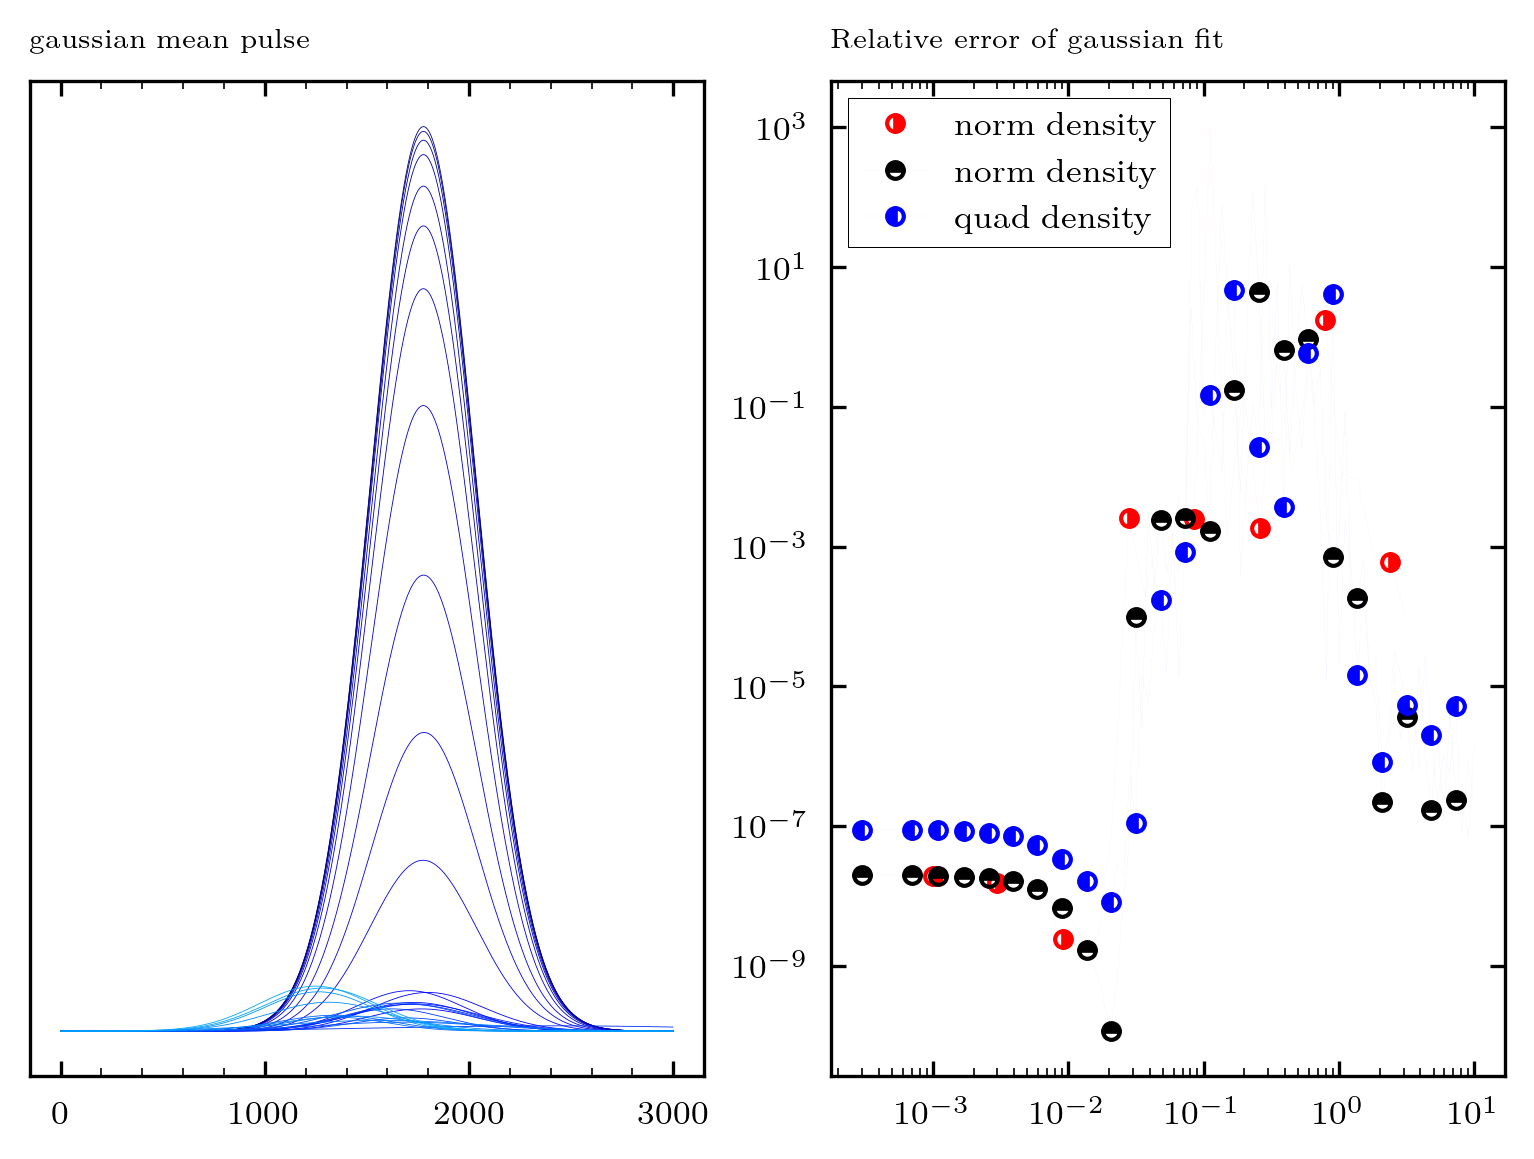

In [126]:
W = 5
fig, ax = plt.subplots(1,2, figsize = (W, W * 3/4), dpi = 300)
cf_cov = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_cov_2 = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_cov_3 = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_quad, axis = 1))])

ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[0].plot(np.array([gaussian(np.arange(3000), *p_opt) for p_opt in cf]).T, lw = .2)
ax[0].set_title('gaussian mean pulse', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].set_yticks([])


ax[1].plot(amplitude_norm[index],cf_cov[index] / cf[:,0][index],  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 0.01, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], cf_cov_2[index_2] / cf_2[:,0][index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 0.01, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], cf_cov_3[index_3] / cf_3[:,0][index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 0.01, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title('Relative error of gaussian fit', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].legend()

Text(0.5, 0, 'amplitude')

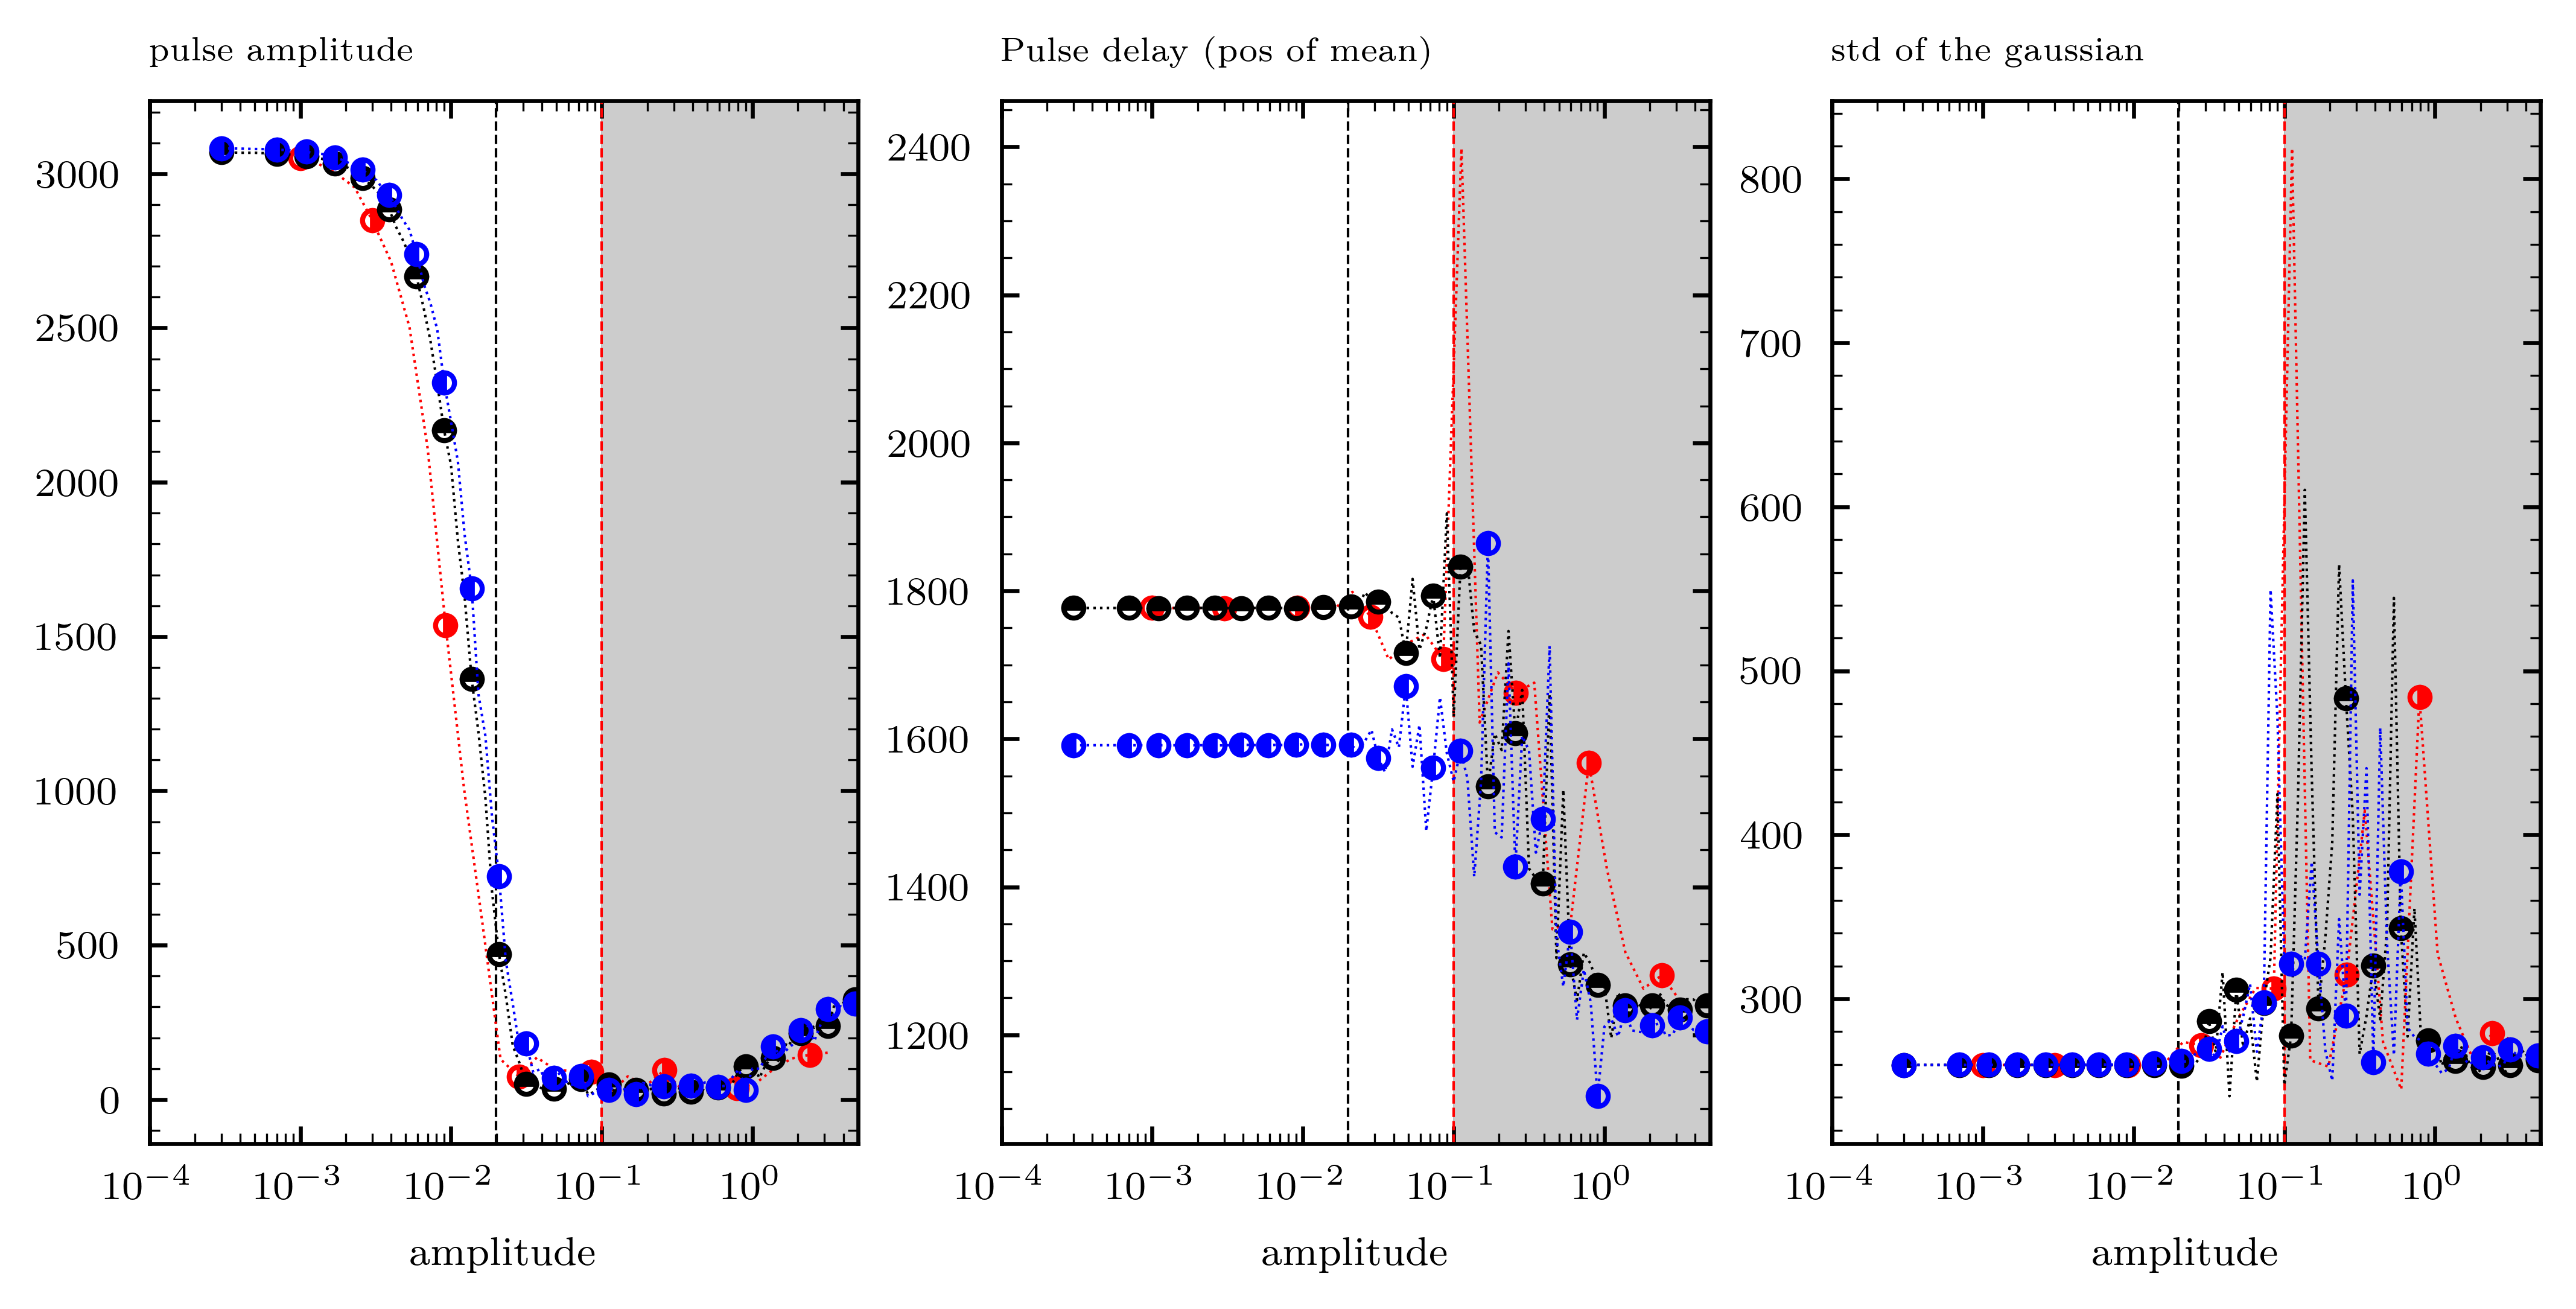

In [130]:
W = 7
fig, ax = plt.subplots(1,3, figsize = (W, W * 2/4))

ax[0].set_title('pulse amplitude', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[0].plot(amplitude_norm[index],cf[:,0][index] ,  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], cf_2[:,0][index_2] , marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], cf_3[:,0][index_3] , marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[0].set_xlim(1e-4, 5)
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_xlabel('amplitude')

ax[1].set_title('Pulse delay (pos of mean)', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].plot(amplitude_norm[index],cf[:,1][index] ,  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], cf_2[:,1][index_2] , marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], cf_3[:,1][index_3] , marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')
ax[1].set_xlim(1e-4, 5)
ax[1].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[1].set_xscale('log')
ax[1].set_xlabel('amplitude')

ax[2].set_title('std of the gaussian', fontsize='small',
    loc='left',
    fontweight='bold',
    style='italic',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index],cf[:,2][index] ,  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[2].plot(amplitude_4[index_2], cf_2[:,2][index_2] , marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[2].plot(amplitude_quad[index_3], cf_3[:,2][index_3] , marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')
ax[2].set_xlim(1e-4, 5)
ax[2].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_xlabel('amplitude')

In [22]:
from scipy.signal import find_peaks

In [26]:
peaks_prop = {'num_spikes' : [], 'peak_widths' : [], 'peak_height' : []}
for i,amp in enumerate(amplitude_norm) : 
    num_spikes = []
    for sample in pulse_norm[i] : 
        peaks, _ = find_peaks(sample,  height = 200, distance = 100, width=100)
        num_spikes.append(len(peaks))
        
    peaks_prop['num_spikes'].append(num_spikes)
    peaks_prop['peak_widths'].append(_['widths'])
    peaks_prop['peak_height'].append(_['peak_heights'])

In [27]:
peaks_prop['peak_widths'] = [peaks_prop['peak_widths'][i] if len(peaks_prop['peak_widths'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_widths']))]
peaks_prop['peak_height'] = [peaks_prop['peak_height'][i] if len(peaks_prop['peak_height'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_height']))]

Text(0.5, 0, 'amplitude')

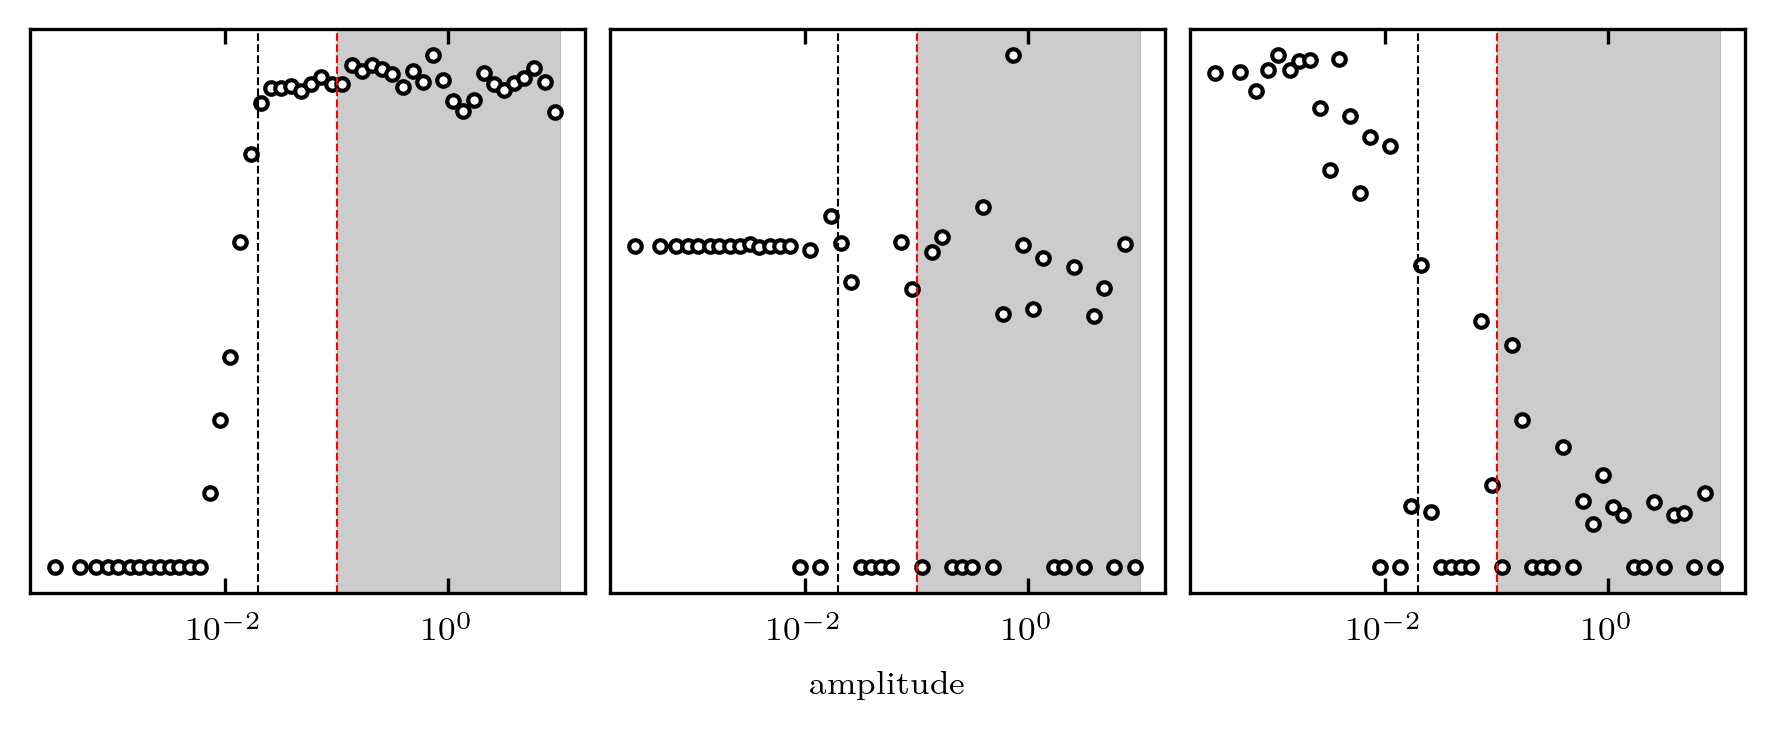

In [28]:
W = 5.8
fig, ax = plt.subplots(1,3, figsize = (W, W * 2/ 5), dpi = 300)
ax[0].plot(amplitude_norm[index], np.std(peaks_prop['num_spikes'], axis = 1)[index],  marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3,   color = 'k')
ax[1].plot(amplitude_norm[index], np.max(peaks_prop['peak_widths'], axis = 1)[index], marker = 'o', label = 'max delay', lw = 0, markevery = 2, ms = 3,   color = 'k')
ax[2].plot(amplitude_norm[index], np.max(peaks_prop['peak_height'], axis = 1)[index], marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3,   color = 'k')

for ax_ in ax : 
    ax_.set_xscale('log')
    ax_.axvline(0.1, color = 'r', ls = '--', lw = .5)
    ax_.axvline(nc2, color = 'k', ls = '--', lw = .5)
    ax_.axvspan(0.1, 10, alpha = 0.2, color = 'k')
    ax_.set_yticks([])
ax[1].set_xlabel('amplitude')


/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


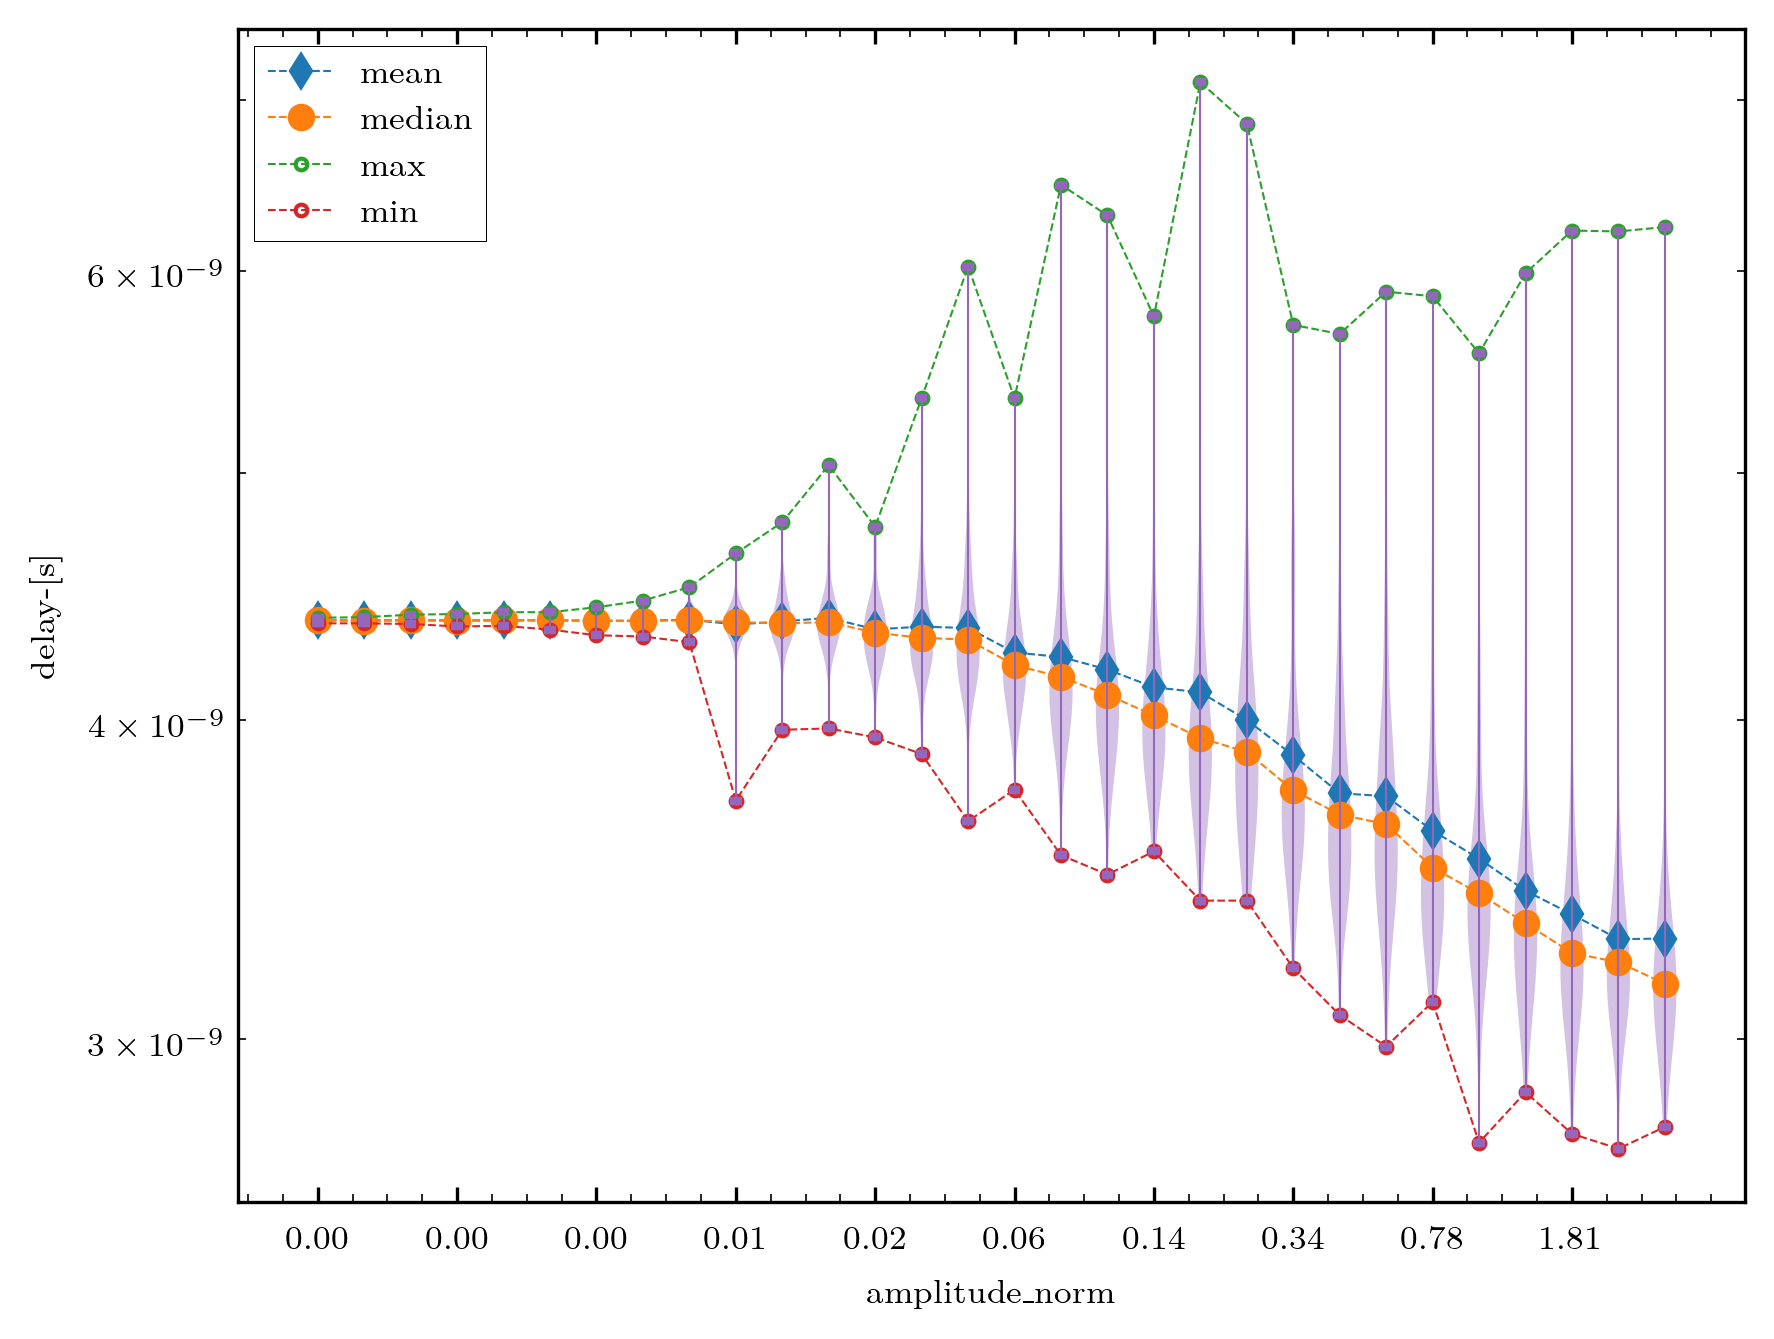

In [133]:
W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, ax = plt.subplots(1, figsize = (W, W * 3 / 4), dpi = 300)

ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.mean(delay_list_norm, axis = 1)[index], lw = .5, marker = 'd', mew = 1 ,ls = '--', label = 'mean')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.median(delay_list_norm, axis = 1)[index], lw = .5, marker = 'o', mew = 1. ,ls = '--', label = 'median')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.max(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1. ,ls = '--', label = 'max')
ax.plot(range(1, len( np.array(amplitude_norm)[index]) + 1), np.min(delay_list_norm, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1, ls = '--', label = 'min')
violins = ax.violinplot(np.array(delay_list_norm)[index].real.T, showmeans=False, showmedians=False)

ax.set_yscale('log')

ax.set_xticks(range(1, len( np.array(amplitude_norm)[index]) + 1, 3))
ax.set_xticklabels([str(r)[:4] for r in np.array(amplitude_norm)[index][::3]])
ax.set_xlabel('amplitude_norm')
ax.set_ylabel('delay-[s]')

for pc in violins['bodies']:

    pc.set_alpha(.4)

violins['cbars'].set_linewidth(.5)

ax.legend()
plt.show()
